**CHAPTER 2: UNVEIL THE DATA SECRETS**

# Notebook initialization

In [6]:
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/Titanic%20disaster/train.csv

--2024-08-25 08:43:59--  https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/Titanic%20disaster/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.002s  

2024-08-25 08:43:59 (29.7 MB/s) - ‘train.csv.1’ saved [60302/60302]



Install the ydata-profiling library

In [7]:
!pip install ydata_profiling

In [8]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from IPython.display import display, HTML

Read the Titanic Dataset:

In [9]:
df = pd.read_csv("/content/train.csv")

survived=0 means the passenger died, survived=1 means he survived, let's make it more clear in the dataset:

In [10]:
df['SurvivedProba'] = df['Survived']
df['SurvivedLabel'] = df['Survived'].map({1: 'alive' , 0: 'dead'})

# First look




Display the 5 firsts rows:

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedProba,SurvivedLabel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,dead
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,alive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,alive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,dead


Some basic inferred infos about the dataset:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  SurvivedProba  891 non-null    int64  
 13  SurvivedLabel  891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


Columns Stats (only for the numerical columns):

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SurvivedProba
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# 2.2 Data Profiling - EDA with YData-Profiling

In [47]:
# Generate the profile report
profile = ProfileReport(df, title="Titanic Dataset Profiling Report")
# Display the report in the notebook
display(HTML(profile.to_html()))

Output hidden; open in https://colab.research.google.com to view.

# 2.3	Business analysis

## 2.3.1 Analyzing by Sex

In [15]:
df["Sex"].value_counts()

,count
Sex,
male,577
female,314


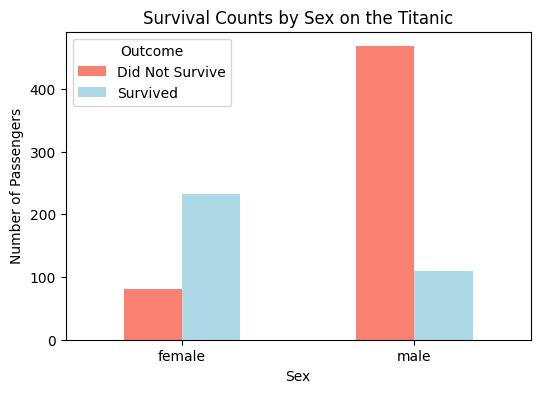

In [16]:
# Group by 'Sex' and 'Survived', then count the number of occurrences
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Create a bar chart
survival_counts.plot(kind='bar', stacked=False, color=['salmon', 'lightblue'], figsize=(6, 4))

# Set the title and labels
plt.title('Survival Counts by Sex on the Titanic')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'], title='Outcome')

# Display the plot
plt.show()

Overall, the data visualized in the bar chart highlights the disparity in survival rates between men and women, suggesting that gender played a crucial role in the likelihood of survival during the Titanic disaster.

## 2.3.2 Analyzing by age range

In [17]:
df["Age"].isnull().sum()

177

We have 177 passengers without age filled out.

In [18]:
with_age = df.dropna(subset=['Age'])
len(with_age)

714

### Calculating mean, median and quartiles

In [19]:
titanic_age_mean = with_age["Age"].mean()
titanic_age_mean

29.69911764705882

In [20]:
titanic_age_median = with_age["Age"].median()
titanic_age_median

28.0

In [21]:
titanic_age_q1 = with_age['Age'].quantile(0.25)
titanic_age_q1

20.125

In [22]:
titanic_age_q3 = with_age['Age'].quantile(0.75)
titanic_age_q3

38.0

### Display Passenger count per age

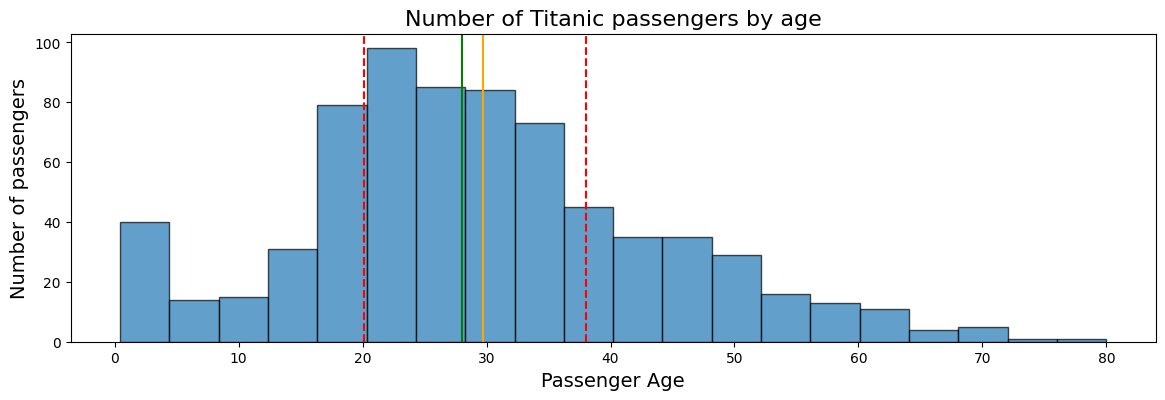

In [23]:
plt.figure(figsize=(14, 4))
plt.hist(with_age["Age"], bins=20, edgecolor='black', alpha=0.7)

plt.axvline(titanic_age_q1, color='red', linestyle='--', label='1st quartile (25%)')
plt.axvline(titanic_age_median, color='green', linestyle='-', label='Median (50%)')
plt.axvline(titanic_age_mean, color='orange', linestyle='-', label='Mean')
plt.axvline(titanic_age_q3, color='red', linestyle='--', label='3rd quartile (75%)')

plt.title('Number of Titanic passengers by age', fontsize=16)
plt.xlabel('Passenger Age', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)
plt.show()

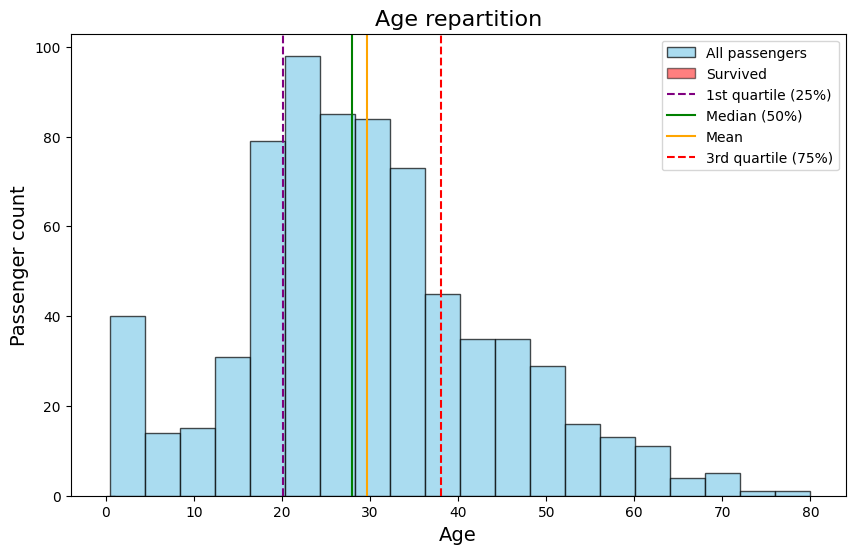

In [24]:
# Separate the survived ages
ages_survivants = with_age[with_age['Survived'] == "alive"]['Age']

plt.figure(figsize=(10, 6))
plt.hist(with_age['Age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue', label='All passengers')

# Add a histogram for survived
plt.hist(ages_survivants, bins=20, edgecolor='black', alpha=0.5, color='red', label='Survived')

# add stats lines
plt.axvline(titanic_age_q1, color='purple', linestyle='--', label='1st quartile (25%)')
plt.axvline(titanic_age_median, color='green', linestyle='-', label='Median (50%)')
plt.axvline(titanic_age_mean, color='orange', linestyle='-', label='Mean')
plt.axvline(titanic_age_q3, color='red', linestyle='--', label='3rd quartile (75%)')

# Labels
plt.title('Age repartition', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Passenger count', fontsize=14)
plt.legend()

plt.show()

It seems very young (babies) had a better chance of survival !

### Analyze Survival Rates by Gender and Age

<ipython-input-25-aadda2b4c773>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_gender_age = titanic_data.groupby(['Sex', 'AgeGroup', 'Survived']).size().unstack(fill_value=0)


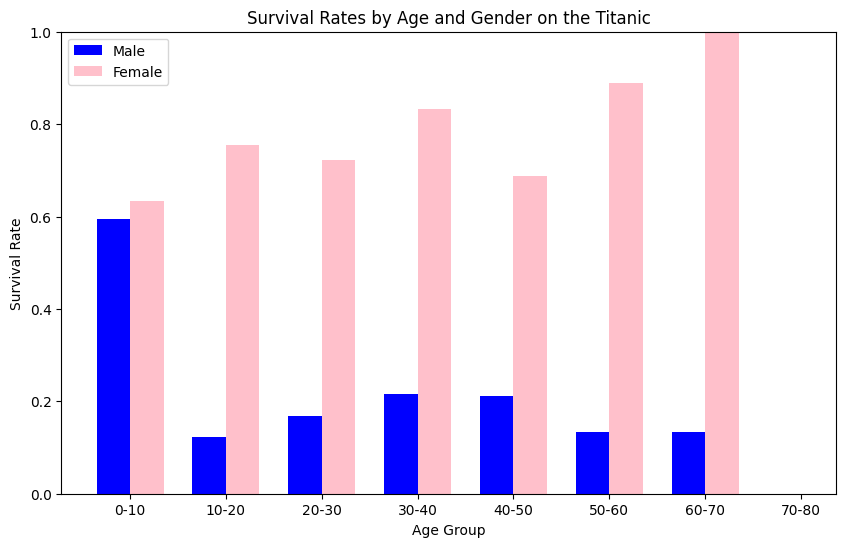

In [25]:
# Define age bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

titanic_data = df.copy()
# Create a new 'AgeGroup' column based on the bins
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Sex', 'AgeGroup', and 'Survived', then count the number of occurrences
survival_by_gender_age = titanic_data.groupby(['Sex', 'AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Calculate survival rates by dividing the number of survivors by the total number of passengers in each group
survival_by_gender_age['SurvivalRate'] = survival_by_gender_age[1] / (survival_by_gender_age[0] + survival_by_gender_age[1])

# Separate data for male and female
male_survival = survival_by_gender_age.loc['male']['SurvivalRate']
female_survival = survival_by_gender_age.loc['female']['SurvivalRate']

# Plot the data
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# X-axis positions for male and female bars
x = np.arange(len(age_labels))

# Plot male survival rates
plt.bar(x - bar_width / 2, male_survival, width=bar_width, color='blue', label='Male')

# Plot female survival rates
plt.bar(x + bar_width / 2, female_survival, width=bar_width, color='pink', label='Female')

# Set the title and labels
plt.title('Survival Rates by Age and Gender on the Titanic')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(x, age_labels)
plt.ylim(0, 1)
plt.legend()

# Display the plot
plt.show()

### Create Age groups

In [26]:
def categorize_age_ranges(df, age_column):
    #Adds a new column to the DataFrame categorizing ages into specified ranges.
    # Define the bins and labels
    bins = [0, 5, 17, 50, float('inf')]
    labels = ['0-5 years', '6-17 years', '18-50 years', 'Above 50 years']
    # Create a new column 'age_range' using pd.cut()
    df['age_range'] = pd.cut(df[age_column], bins=bins, labels=labels, right=True, include_lowest=True)
    return df

with_age = categorize_age_ranges(with_age, "Age")

<ipython-input-26-4f31dd69e8eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_range'] = pd.cut(df[age_column], bins=bins, labels=labels, right=True, include_lowest=True)


In [27]:
# Count the number of passengers and survivors in each age range category
age_range_counts = with_age['age_range'].value_counts().sort_index()
survivor_counts = with_age[with_age['Survived'] == 'alive']['age_range'].value_counts().sort_index()

# Combine counts into a DataFrame for easier calculations
counts_df = pd.DataFrame({
    'Total Passengers': age_range_counts,
    'Survivors': survivor_counts
}).fillna(0)  # Fill NaN with 0 for age ranges with no survivors

# Calculate the survival percentage
counts_df['Survival Percentage'] = (counts_df['Survivors'] / counts_df['Total Passengers'] * 100).fillna(0)

# Print the table
print(counts_df[['Total Passengers', 'Survivors', 'Survival Percentage']])

                Total Passengers  Survivors  Survival Percentage
age_range                                                       
0-5 years                     44          0                  0.0
6-17 years                    69          0                  0.0
18-50 years                  537          0                  0.0
Above 50 years                64          0                  0.0


**Conclusion: It's now obvious kids (from 0 to 5 years) had a better chance of survival.**

## 2.3.3 Analyzing Ticket & Fare

Have you noticed that the fare mentioned is not the "unit fare per person" and that the "Ticket" field is not a unique key?

Check if the ticket is unique:

In [28]:
len(df['Ticket'].unique())

681

That's weird as it seems several people have the same ticket number ... but who ?

In [29]:
# Group passengers by ticket number and count the number of occurrences
ticket_counts = df.groupby('Ticket')['PassengerId'].count().reset_index()
# Filter for ticket numbers that have more than 1 passenger
same_ticket_passengers = ticket_counts[ticket_counts['PassengerId'] > 1]
# Merge the filtered dataframe back with the original dataframe
df.merge(same_ticket_passengers[['Ticket']], on='Ticket', how='inner')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedProba,SurvivedLabel
0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,alive
1,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,0,dead
2,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,dead
3,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,0,dead
4,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S,0,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,0,dead
340,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,dead
341,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,dead
342,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,0,dead


We can draw a chart that will show how many groups there are of each size, where size 1 represents individual travelers, size 2 represents pairs, and so on.

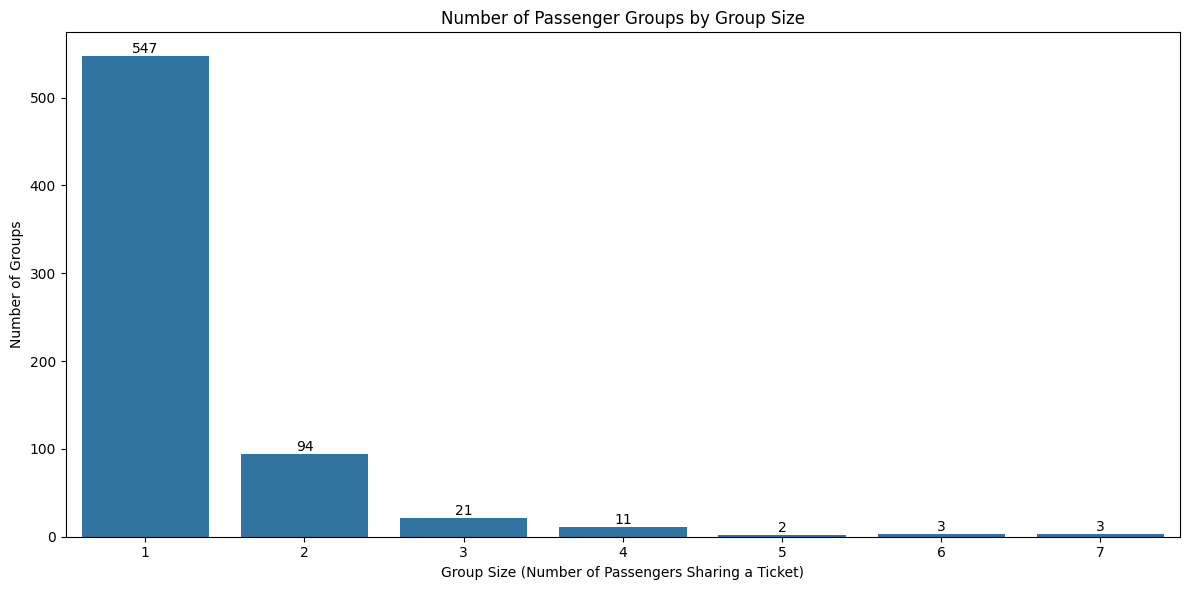

In [30]:
# Count the number of passengers per ticket
ticket_counts = df['Ticket'].value_counts().reset_index()
ticket_counts.columns = ['Ticket', 'GroupSize']

# Count how many groups there are of each size
group_size_distribution = ticket_counts['GroupSize'].value_counts().sort_index()

# Create the chart
plt.figure(figsize=(12, 6))
sns.barplot(x=group_size_distribution.index, y=group_size_distribution.values)

plt.title('Number of Passenger Groups by Group Size')
plt.xlabel('Group Size (Number of Passengers Sharing a Ticket)')
plt.ylabel('Number of Groups')

# Add value labels on top of each bar
for i, v in enumerate(group_size_distribution.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Let's look in detail the relationship between ticket & fare now and regroup the same tickets number together to check if the fare is the same for all passengers with that ticket:

In [31]:
def check_same_fare_for_tickets(df):
    # Group by Ticket and get unique fares for each ticket
    ticket_fares = df.groupby('Ticket')['Fare'].unique().reset_index()
    # Check if all fares for each ticket are the same
    ticket_fares['SameFare'] = ticket_fares['Fare'].apply(lambda x: len(set(x)) == 1)
    # Merge this information back to the original dataframe
    df_result = df.merge(ticket_fares[['Ticket', 'SameFare']], on='Ticket', how='left')
    return df_result

df_with_same_fare_check = check_same_fare_for_tickets(df)
print("\nPercentage of tickets with same fare:")
print(df_with_same_fare_check['SameFare'].value_counts(normalize=True) * 100)


Percentage of tickets with same fare:
SameFare
True     99.775533
False     0.224467
Name: proportion, dtype: float64


This output shows that for most tickets, all passengers with the same ticket number paid the same fare. Only about 0.22% of tickets had different fares for the same ticket number. These are the passenger with the same ticket but different fares:

In [32]:
df_with_same_fare_check[ df_with_same_fare_check["SameFare"] == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedProba,SurvivedLabel,SameFare
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,0,dead,False
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,0,dead,False


Likely these two passengers does not have the same last name, we may consider here a Data Quality issue on the Ticket number here.

***As a conclusion:***
* We can consider 891-547=344 people travels in group (mostly in family)
* The fare specified in the dataset is the global Fare paid by the group (it's not an indivudual Fare)
* We can consider a Data quality issue with the Ticket number for passengers 139 and 877

**This analysis can be useful for understanding ticket pricing patterns and potentially identifying group bookings or families traveling together. It could also help in detecting data inconsistencies or special fare arrangements.**

## 2.3.4 Analyzing passenger names

In [33]:
df["Name"].value_counts().sort_values(ascending=False)

,count
Name,
"Braund, Mr. Owen Harris",1
"Saundercock, Mr. William Henry",1
"Andersson, Mr. Anders Johan",1
"Heikkinen, Miss. Laina",1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
...,...
"Rice, Mrs. William (Margaret Norton)",1
"Montvila, Rev. Juozas",1
"Graham, Miss. Margaret Edith",1


In [34]:
df["Name"].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Let's see if we can find out a common pattern for the Name. First we try to detect the pattern by reading character by character:

In [35]:
def name_to_pattern(name):
    pattern = name
    pattern = re.sub(r'[A-Z]', 'C', pattern)  # Uppercase letters
    pattern = re.sub(r'[a-z]', 'c', pattern)  # Lowercase letters
    pattern = re.sub(r'[0-9]', '#', pattern)  # Numbers
    pattern = re.sub(r'\s', ' ', pattern)     # Spaces
    pattern = re.sub(r'\.', '.', pattern)     # Dots
    pattern = re.sub(r',', ',', pattern)      # Commas
    pattern = re.sub(r'\(', '［', pattern)     # Opening parenthesis
    pattern = re.sub(r'\)', '］', pattern)     # Closing parenthesis
    return pattern
df['NamePattern'] = df['Name'].apply(name_to_pattern)
df['NamePattern'].head()

,NamePattern
0,"Cccccc, Cc. Cccc Cccccc"
1,"Ccccccc, Ccc. Cccc Ccccccc ［Cccccccc Cccccc Cc..."
2,"Ccccccccc, Cccc. Ccccc"
3,"Cccccccc, Ccc. Ccccccc Ccccc ［Cccc Ccc Cccc］"
4,"Ccccc, Cc. Ccccccc Ccccc"


These are all the possible patterns (580 possibilities):

In [36]:
df['NamePattern'].value_counts()

,count
NamePattern,
"Ccccccc, Cc. Cccccc",14
"Cccccc, Cc. Cccccc",12
"Cccccc, Cc. Ccccc",12
"Ccccccc, Cc. Ccccc",12
"Ccccc, Cc. Ccccc",11
...,...
"Cccccccc, Cc. Cccccc Cccc ""Ccccc""",1
"Ccccc, Cccc. Cccc C",1
"Ccccccc, Cc. Ccccccc Ccccccc Cc",1


580/891 patterns is definitely too big, we need to reduce the pattern scope detection by addressing the words instead the characters :

In [37]:
def name_to_word_pattern(name):
    # Remove content within parentheses
    name_without_parentheses = re.sub(r'\([^)]*\)', '', name).strip()

    # Split the name into words
    words = re.findall(r'\b\w+\b|\.|,', name_without_parentheses)
    pattern = []
    for word in words:
        if word in [',', '.']:
            pattern.append(word)
        elif word.lower() in ['mr', 'mrs', 'miss', 'master', 'dr', 'rev', 'col', 'major', 'capt']:
            pattern.append('TITLE')
        elif word.lower() in ['van', 'de', 'der', 'du', 'di', 'la', 'le']:
            pattern.append('PREFIX')
        else:
            if not pattern or pattern[-1] != 'NAME':
                pattern.append('NAME')
    return ' '.join(pattern)
df['NamePattern'] = df['Name'].apply(name_to_word_pattern)

We also:
* Do not take in account the content between parenthesis
* Consider several following NAME (pattern) as one. NAME is a pattern that can contains anything (mostly first or last name)
* Create a Prefix pattern
* Create a Title pattern

In [38]:
df['NamePattern'].value_counts()

,count
NamePattern,
"NAME , TITLE . NAME",856
"NAME , TITLE .",15
"NAME , NAME . NAME",8
"PREFIX NAME , TITLE . NAME",8
"NAME , TITLE . NAME PREFIX NAME",2
"PREFIX PREFIX NAME , TITLE . NAME",1
"NAME , NAME .",1


This is much more better, as we can see here a global structure for the Name.

Extract titles from the Name

In [39]:
def parse_name(name):
    # Remove content within parentheses
    name_without_parentheses = re.sub(r'\([^)]*\)', '', name).strip()

    # Split the name into words
    words = re.findall(r'\b\w+\b|\.|,', name_without_parentheses)

    names = []
    prefix = None
    title = None

    for word in words:
        if word.lower() in ['mr', 'mrs', 'miss', 'master', 'dr', 'rev', 'col', 'major', 'capt']:
            title = word
        elif word.lower() in ['van', 'de', 'der', 'du', 'di', 'la', 'le']:
            prefix = word
        elif word not in [',', '.']:
            names.append(word)

    return {
        'names': names,
        'prefix': prefix,
        'title': title
    }

# Apply the parsing function to the Name column
df['NameComponents'] = df['Name'].apply(parse_name)

# Extract individual components
df['NameList'] = df['NameComponents'].apply(lambda x: x['names'])
df['Prefix'] = df['NameComponents'].apply(lambda x: x['prefix'])
df['Title'] = df['NameComponents'].apply(lambda x: x['title'])

# Remove the temporary NameComponents column
df = df.drop('NameComponents', axis=1)

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedProba,SurvivedLabel,NamePattern,NameList,Prefix,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,dead,"NAME , TITLE . NAME","[Braund, Owen, Harris]",None,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,alive,"NAME , TITLE . NAME","[Cumings, John, Bradley]",None,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alive,"NAME , TITLE . NAME","[Heikkinen, Laina]",None,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,alive,"NAME , TITLE . NAME","[Futrelle, Jacques, Heath]",None,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,dead,"NAME , TITLE . NAME","[Allen, William, Henry]",None,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,dead,"NAME , TITLE . NAME","[Montvila, Juozas]",None,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,alive,"NAME , TITLE . NAME","[Graham, Margaret, Edith]",None,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,dead,"NAME , TITLE . NAME","[Johnston, Catherine, Helen, Carrie]",None,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,alive,"NAME , TITLE . NAME","[Behr, Karl, Howell]",None,Mr


In [41]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Major,2
Col,2
Capt,1


Now groups the titles by categories:

In [42]:
def categorize_title(title):
    if title in ['Mr', 'Mrs', 'Ms', 'Miss', 'Mme', 'Mlle']:
        return 'Common'
    elif title in ['Master', 'Don', 'Lady', 'Sir', 'Jonkheer', 'Dona']:
        return 'Rich'
    elif title in ['Rev', 'Dr', 'Major', 'Col', 'Capt']:
        return 'Professional'
    else:
        return np.nan

df['social'] = df['Title'].apply(categorize_title)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedProba,SurvivedLabel,NamePattern,NameList,Prefix,Title,social
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,dead,"NAME , TITLE . NAME","[Braund, Owen, Harris]",None,Mr,Common
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,alive,"NAME , TITLE . NAME","[Cumings, John, Bradley]",None,Mrs,Common
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alive,"NAME , TITLE . NAME","[Heikkinen, Laina]",None,Miss,Common
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,alive,"NAME , TITLE . NAME","[Futrelle, Jacques, Heath]",None,Mrs,Common
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,dead,"NAME , TITLE . NAME","[Allen, William, Henry]",None,Mr,Common


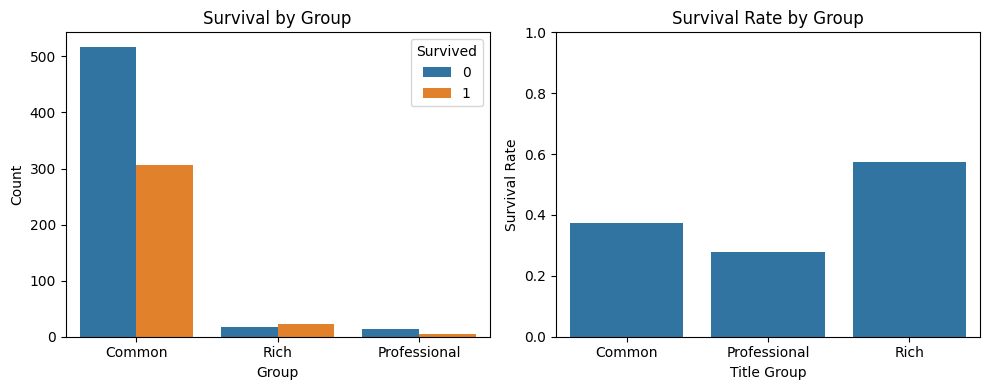

In [43]:
def plotByGroupAndRate(df, col):
  fig, axs = plt.subplots(1, 2, figsize=(10, 4))

  sns.countplot(x=col, hue="Survived", data=df[df["Survived"].notnull()], ax=axs[0])
  axs[0].set_title("Survival by Group")
  axs[0].set_xlabel("Group")
  axs[0].set_ylabel("Count")

  survival_rates = df.groupby(col)['SurvivedProba'].mean()
  sns.barplot(x=survival_rates.index, y=survival_rates.values, ax=axs[1])
  axs[1].set_title('Survival Rate by Group')
  axs[1].set_xlabel('Title Group')
  axs[1].set_ylabel('Survival Rate')
  axs[1].set_ylim(0, 1)

  plt.tight_layout()
  plt.show()

plotByGroupAndRate(df, "social")

## Analyzing Family (Size)

Calculate the Family size and if passenger travels alone:

In [44]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Solo'] = df['FamilySize'].apply(lambda x: 1 if x > 1 else 0)

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,SurvivedProba,SurvivedLabel,NamePattern,NameList,Prefix,Title,social,FamilySize,Solo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,dead,"NAME , TITLE . NAME","[Braund, Owen, Harris]",None,Mr,Common,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,alive,"NAME , TITLE . NAME","[Cumings, John, Bradley]",None,Mrs,Common,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,alive,"NAME , TITLE . NAME","[Heikkinen, Laina]",None,Miss,Common,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,alive,"NAME , TITLE . NAME","[Futrelle, Jacques, Heath]",None,Mrs,Common,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,dead,"NAME , TITLE . NAME","[Allen, William, Henry]",None,Mr,Common,1,0


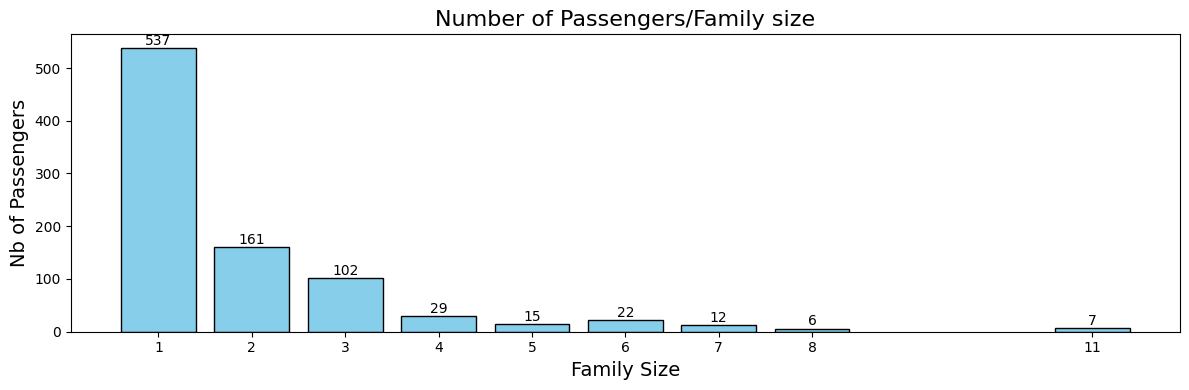

In [46]:
cumul_counts = df['FamilySize'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
plt.bar(cumul_counts.index, cumul_counts.values, color='skyblue', edgecolor='black')

for i, v in enumerate(cumul_counts.values):
    plt.text(cumul_counts.index[i], v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Number of Passengers/Family size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Nb of Passengers', fontsize=14)

plt.xticks(cumul_counts.index)
plt.tight_layout()
plt.show()